# Diamond Price Prediction

In [73]:
import pandas as pd
import numpy as np
dia=pd.read_csv("DiamondPricesData.csv")

In [74]:
dia.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


Price is in US dollars

Carat weight of the diamond

Cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm

y width in mm

z depth in m

depth: The height of a diamond

table: The width of the diamond’s table expressed as a percentage of its average diameter

In [75]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53934 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53926 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Target variable : price


## Predictor variables :

### 1) Categorical Variables: 

#### a) Ordinal Variables : [ clarity,cut, color]

#### Cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
#### color diamond colour, from J (worst) to D (best)
#### clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))


### 2) Continious Variables : [carat, x, y, z, table, depth]

## Missing value Treatment

In [76]:
dia['color'].mode()

0    G
dtype: object

In [77]:
dia['color']=dia['color'].fillna(dia['color'].mode()[0])

In [78]:
dia['depth'].median()

61.8

In [79]:
dia['depth']=dia['depth'].fillna(dia['depth'].median())

In [80]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# EXPLORATORY DATA ANALYSIS

## Plotting the continuos variables

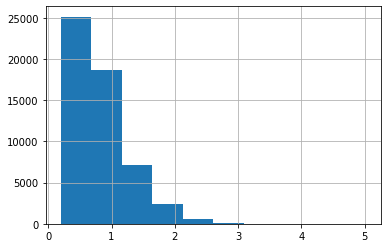

In [81]:
dia['carat'].hist()

# Outlier Treatment

In [82]:
dia.loc[(dia['carat']>2.3,'carat')]=2.3

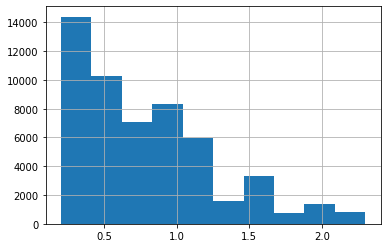

In [83]:
dia['carat'].hist()

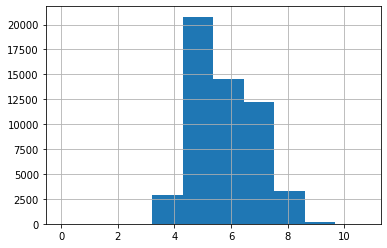

In [84]:
dia['x'].hist()

In [85]:
dia[dia['x']<3.8]['x'].unique()

array([3.79, 0.  , 3.73, 3.74, 3.76, 3.77])

In [86]:
dia.loc[(dia['x']<3.73,'x')]=3.73

In [87]:
dia.loc[(dia['x']>8.4,'x')]=8.4

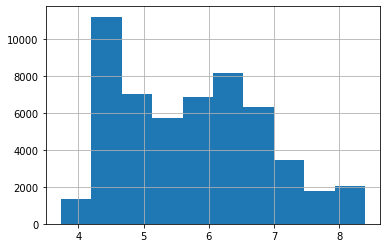

In [88]:
dia['x'].hist()

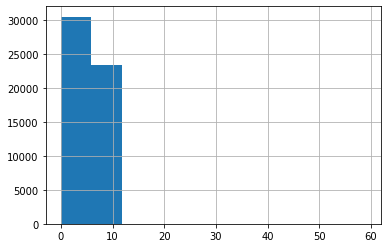

In [89]:
dia['y'].hist()

In [90]:
dia.loc[(dia['y']>9.0,'y')]=9.0

In [91]:
dia.loc[(dia['y']<3.68,'y')]=3.68

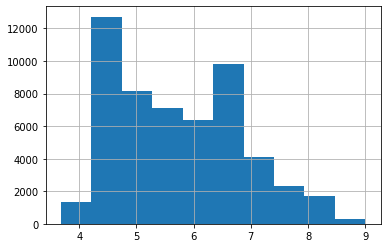

In [92]:
dia['y'].hist()

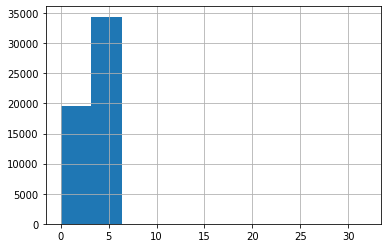

In [93]:
dia['z'].hist()

In [94]:
dia[dia['z']>6.98]['z'].unique()

array([ 8.06, 31.8 ])

In [95]:
dia.loc[(dia['z']>5.5,'z')]=5.5

In [96]:
dia[dia['z']<2.5]['z'].unique()

array([2.43, 2.31, 2.48, 2.47, 2.49, 2.39, 2.46, 2.33, 2.27, 2.41, 2.4 ,
       2.42, 2.44, 2.37, 2.45, 0.  , 2.35, 2.36, 1.07, 1.53, 1.41, 2.26,
       2.24, 2.32, 2.28, 2.3 , 2.38, 2.34, 2.29, 2.06, 2.25])

In [97]:
dia.loc[(dia['z']<2.5,'z')]=2.5

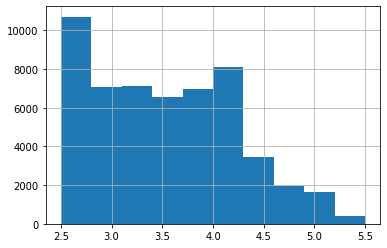

In [98]:
dia['z'].hist()

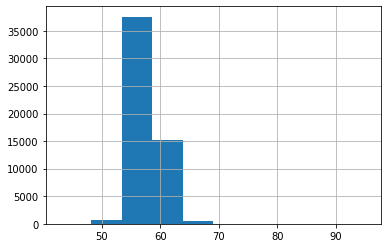

In [99]:
dia['table'].hist()

In [100]:
dia.loc[(dia['table']>62,'table')]=62

In [101]:
dia.loc[(dia['table']<52.5,'table')]=52.5

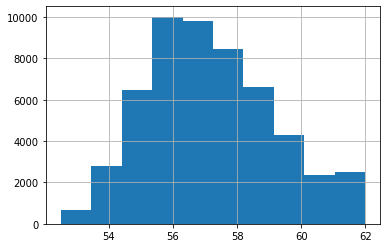

In [102]:
dia['table'].hist()

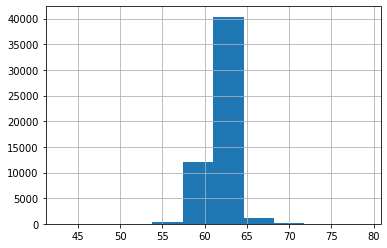

In [103]:
dia['depth'].hist()

In [104]:
dia[dia['depth']>67]['depth'].unique()

array([67.9, 67.4, 67.3, 68.1, 67.8, 67.6, 68.2, 67.7, 69.5, 67.1, 69.3,
       68.3, 68.5, 68.4, 69.7, 68.7, 68.6, 71.6, 68.8, 67.5, 69. , 68.9,
       69.6, 67.2, 70.1, 71.3, 70.6, 69.8, 71.8, 70. , 69.4, 68. , 70.2,
       70.5, 71. , 69.1, 70.8, 78.2, 71.2, 69.2, 73.6, 69.9, 72.2, 79. ,
       72.9])

In [105]:
dia.loc[(dia['depth']>66,'depth')]=66

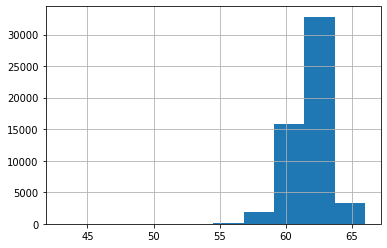

In [106]:
dia['depth'].hist()

In [107]:
dia.loc[(dia['depth']<57.5,'depth')]=57.5

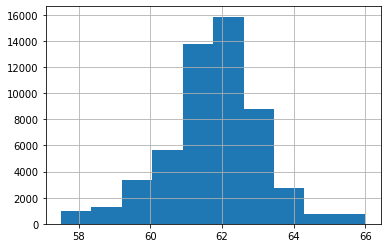

In [108]:
dia['depth'].hist()

In [109]:
dia.nunique()

price      11602
carat        211
cut            5
color          7
clarity        8
depth         86
table         93
x            465
y            521
z            301
dtype: int64

# Bar Plots

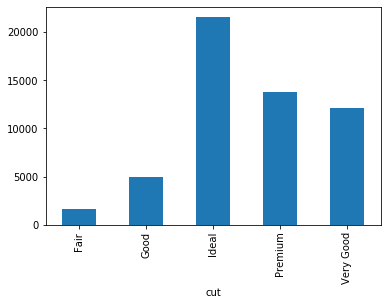

In [110]:
dia.groupby('cut').size().plot(kind='bar')

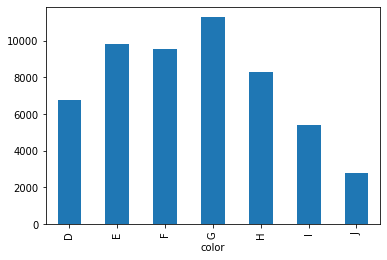

In [111]:
dia.groupby('color').size().plot(kind='bar')

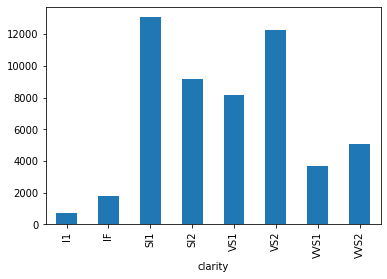

In [112]:
dia.groupby('clarity').size().plot(kind='bar')

# HYPOTHISIS TESTING

# Corelation between target and continuous predictors

In [113]:
dia.corr()

,price,carat,depth,table,x,y,z
price,1.000000,0.924086,-0.011905,0.133726,0.885544,0.887992,0.881161
carat,0.924086,1.000000,0.023517,0.188142,0.978593,0.978806,0.977471
depth,-0.011905,0.023517,1.000000,-0.296651,-0.027768,-0.030992,0.091881
table,0.133726,0.188142,-0.296651,1.000000,0.200314,0.194558,0.162159
x,0.885544,0.978593,-0.027768,0.200314,1.000000,0.998238,0.990137
y,0.887992,0.978806,-0.030992,0.194558,0.998238,1.000000,0.989925
z,0.881161,0.977471,0.091881,0.162159,0.990137,0.989925,1.000000


# Droping DEPTH and TABLE as they are not corelated with the target variable price

In [114]:
dia.drop(['depth','table'],inplace=True,axis=1)

In [115]:
dia.head()

,price,carat,cut,color,clarity,x,y,z
0,326,0.23,Ideal,E,SI2,3.95,3.98,2.50
1,326,0.21,Premium,E,SI1,3.89,3.84,2.50
2,327,0.23,Good,E,VS1,4.05,4.07,2.50
3,334,0.29,Premium,I,VS2,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,4.34,4.35,2.75


# Anova Test for checking categorical variables with target variable price.

In [116]:
def FunctionAnova(inputData, targetVar, categoricalPredictors):
    from scipy.stats import f_oneway
    for cat in categoricalPredictors:
        CategoryGroupLists=inputData.groupby(cat)[targetVar].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        print(cat+'--> P-Value for Anova is: ', AnovaResults[1])

In [117]:
FunctionAnova(dia,'price',['cut','color','clarity'])

cut--> P-Value for Anova is:  8.42830730759452e-150
color--> P-Value for Anova is:  0.0
clarity--> P-Value for Anova is:  1.9190895e-316


# All categorical variables are required as the p value is < 0.05 

In [118]:

#### Cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
#### color diamond colour, from J (worst) to D (best)
#### clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In [119]:
dia['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [120]:
dia['cut'].replace({'Ideal':5, 'Premium':4, 'Good':2, 'Very Good':3, 'Fair':1},inplace=True)

In [121]:
dia['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [122]:
dia['color'].replace({'E':2, 'I':6, 'J':7, 'H':5, 'F':3, 'G':4, 'D':1},inplace=True)

In [123]:
dia['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [124]:
dia['clarity'].replace({'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7,'IF':8},inplace=True)

In [125]:
dia.head()

,price,carat,cut,color,clarity,x,y,z
0,326,0.23,5,2,2,3.95,3.98,2.50
1,326,0.21,4,2,3,3.89,3.84,2.50
2,327,0.23,2,2,5,4.05,4.07,2.50
3,334,0.29,4,6,4,4.20,4.23,2.63
4,335,0.31,2,7,2,4.34,4.35,2.75


In [126]:
dia.to_pickle('diamondFinal.pkl')

In [127]:
d=pd.read_pickle('diamondFinal.pkl')

In [128]:
d.columns

Index(['price', 'carat', 'cut', 'color', 'clarity', 'x', 'y', 'z'], dtype='object')

# splitting data for training and testing

In [129]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'
Predictors=['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']
X=d[Predictors].values
y=d[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple linear regression

In [130]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy on Test Data:',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

LinearRegression()
R2 Value: 0.9158938215796928
Accuracy on Test Data: 56.994505702031375


,carat,cut,color,clarity,x,y,z,price,Predictedprice
0,0.24,5.0,4.0,7.0,3.97,4.00,2.50,559,1098.0
1,0.58,3.0,3.0,6.0,5.44,5.42,3.26,2201,2849.0
2,0.40,5.0,2.0,6.0,4.76,4.74,2.95,1238,2102.0
3,0.43,4.0,2.0,6.0,4.92,4.89,2.98,1304,2178.0
4,1.55,5.0,2.0,2.0,7.44,7.37,4.61,6901,10311.0


# Decision tree

DecisionTreeRegressor(max_depth=1)
R2 Value: 0.6105951715769014
Accuracy 30.169655863890654


,carat,cut,color,clarity,x,y,z,price,Predictedprice
0,0.24,5.0,4.0,7.0,3.97,4.00,2.50,559,1636.0
1,0.58,3.0,3.0,6.0,5.44,5.42,3.26,2201,1636.0
2,0.40,5.0,2.0,6.0,4.76,4.74,2.95,1238,1636.0
3,0.43,4.0,2.0,6.0,4.92,4.89,2.98,1304,1636.0
4,1.55,5.0,2.0,2.0,7.44,7.37,4.61,6901,8159.0


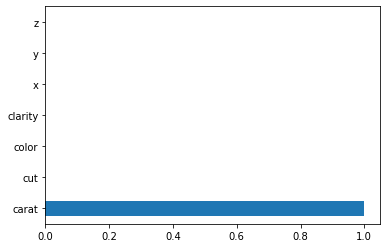

In [131]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=1,criterion='mse')

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

# Random forest

RandomForestRegressor(max_depth=2)
R2 Value: 0.829656747255836
Accuracy 64.71522283738491


,carat,cut,color,clarity,x,y,z,price,Predictedprice
0,0.24,5.0,4.0,7.0,3.97,4.00,2.50,559,1054.0
1,0.58,3.0,3.0,6.0,5.44,5.42,3.26,2201,1054.0
2,0.40,5.0,2.0,6.0,4.76,4.74,2.95,1238,1054.0
3,0.43,4.0,2.0,6.0,4.92,4.89,2.98,1304,1054.0
4,1.55,5.0,2.0,2.0,7.44,7.37,4.61,6901,12323.0


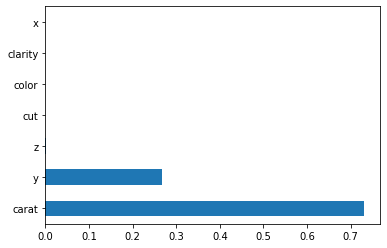

In [132]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=2, n_estimators=100,criterion='mse')

# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

# XG Boost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
[13:35:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror

,carat,cut,color,clarity,x,y,z,price,Predictedprice
0,0.24,5.0,4.0,7.0,3.97,4.00,2.50,559,464.0
1,0.58,3.0,3.0,6.0,5.44,5.42,3.26,2201,2276.0
2,0.40,5.0,2.0,6.0,4.76,4.74,2.95,1238,1303.0
3,0.43,4.0,2.0,6.0,4.92,4.89,2.98,1304,1426.0
4,1.55,5.0,2.0,2.0,7.44,7.37,4.61,6901,10524.0


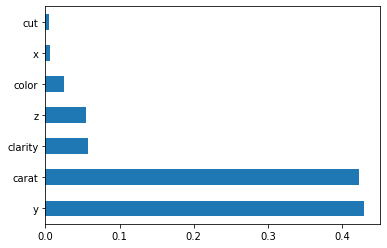

In [133]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=1000, objective='reg:linear', booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

# XG BOOST 88%


In [134]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalXGBoostModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(XGB, fileWriteStream)
    # Don't forget toa close the filestream!
    fileWriteStream.close()

In [139]:
import pickle
with open('FinalXGBoostModel.pkl', 'rb') as fileReadStream:
    XGBoost_model=pickle.load(fileReadStream)
    # Don't forget to close the filestream!
    fileReadStream.close()

[13:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [142]:
from tkinter import *
from tkinter import ttk
import random
import numpy
root = Tk()
root.title('Diamond Price Prediction')
root.geometry('850x650')
root.configure(background="#E5E8E8")
var = StringVar()
label = Label( root, textvariable = var,font=('arial',20,'bold'),bd=20,background="#E5E8E8")
var.set('Diamond Price Prediction')
label.grid(row=0,columnspan=6)


label_1 = ttk.Label(root, text ='Carat',font=("Helvetica", 16),background="#E5E8E8")
label_1.grid(row=11,column=0)
    
Entry_1= Entry(root)
Entry_1.grid(row=11,column=1)

##################################

label_2 = ttk.Label(root, text ='Cut',font=("Helvetica", 16),background="#E5E8E8")
label_2.grid(row=12,column=0)


cut= StringVar(root)

# Dictionary with options
cutChoices = {'Ideal', 'Premium', 'Good', 'Very Good', 'Fair'}
cut.set('Ideal') # set the default option
popupMenu = OptionMenu(root, cut, *cutChoices)
popupMenu.grid(row = 12, column = 1)

# on change dropdown value
def change_dropdown(*args):
    print( cut.get() )

# link function to change dropdown
cut.trace('w', change_dropdown)


###################################################
##################################

label_3 = ttk.Label(root, text ='Colour',font=("Helvetica", 16),background="#E5E8E8")
label_3.grid(row=13,column=0)


colour= StringVar(root)

# Dictionary with options
colourChoices = {'E', 'I', 'J', 'H', 'F', 'G', 'D'}
colour.set('E') # set the default option
popupMenu = OptionMenu(root, colour, *colourChoices)
popupMenu.grid(row = 13, column = 1)

# on change dropdown value
def change_dropdown(*args):
    print( colour.get() )

# link function to change dropdown
colour.trace('w', change_dropdown)


###################################################3##################################

label_4 = ttk.Label(root, text ='Clarity',font=("Helvetica", 16),background="#E5E8E8")
label_4.grid(row=14,column=0)


clarity= StringVar(root)

# Dictionary with options
clarityChoices = {'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1','IF'}
clarity.set('I1') # set the default option
popupMenu = OptionMenu(root, clarity, *clarityChoices)
popupMenu.grid(row = 14, column = 1)

# on change dropdown value
def change_dropdown(*args):
    print( clarity.get() )

# link function to change dropdown
clarity.trace('w', change_dropdown)


###################################################3



label_5 = ttk.Label(root, text ='X',font=("Helvetica", 16),background="#E5E8E8")
label_5.grid(row=15,column=0)
    
Entry_5 = Entry(root)
Entry_5.grid(row=15,column=1)

label_6 = ttk.Label(root, text ='Y',font=("Helvetica", 16),background="#E5E8E8")
label_6.grid(row=16,column=0)
    
Entry_6 = Entry(root)
Entry_6.grid(row=16,column=1)

label_7 = ttk.Label(root, text ='Z',font=("Helvetica", 16),background="#E5E8E8")
label_7.grid(row=17,column=0)
    
Entry_7 = Entry(root)
Entry_7.grid(row=17,column=1)



def predict():
    dictCut={'Ideal':5, 'Premium':4, 'Good':2, 'Very Good':3, 'Fair':1}
    dictColor={'E':2, 'I':6, 'J':7, 'H':5, 'F':3, 'G':4, 'D':1}
    dictClarity={'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7,'IF':8}
    carat = Entry_1.get()
    Cut = dictCut[cut.get()]
    color = dictColor[colour.get()]
    Clarity = dictClarity[clarity.get()]
    x = Entry_5.get()
    y = Entry_6.get()
    z = Entry_7.get()
    list=[[float(carat),float(Cut),float(color),float(Clarity),float(x),float(y),float(z)]]
    o=XGBoost_model.predict(numpy.array(list))
    
    label_out = ttk.Label(root, text =str(round(o[0],2))+str(' $'),font=("Helvetica", 16),background="#E5E8E8")
    label_out.grid(row=21,column=1)
    
    
b1 = Button(root, text = 'Predict',font=("Helvetica", 16),background="white",command = predict)
b1.grid(row=21,column=0)
    
root.mainloop()

SI2
SI1
Premium
